In [545]:
%reset -f 

In [614]:
import pandas as pd
import numpy as np
from IPython.display import display
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 100)
pd.options.display.precision = 4

from myDefs.defs import *

# visualization
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
%matplotlib inline


In [ ]:
'''DATA_PATH + 'final sample.xlsx'
df = pd.read_csv(file, sep=',')  '''

In [547]:
file = DATA_PATH + "anonymousTranslated.csv"
df = pd.read_csv(file, sep=',')  

In [548]:
print(df.shape)

(1135, 14)


In [549]:
df.head(15)

,Code,Days of hospitalization,Sex,Age,Date of surgery,Patient classification,Name of surgery,Responsible surgeon,Urgency,Surgical approach,Complications,Kk,Simple,Severe
0,1135541,NaN,female,43.0,03/12/2018,Upper GI,OPEN DISTAL SUBTOTAL GASTRECTOMY 436320,NaN,elective,open,NaN,1.0,NaN,NaN
1,11341892,41.0,female,30.0,03/13/2018,upper GI,DIAGNOSTIC LAPAROSCOPY 493200;OPEN DISTAL SUBT...,NaN,urgent,LAPAROSCOPIC,Anastomotic Leak,1.0,NaN,1.0
2,11339133,NaN,male,26.0,11/21/2018,upper GI,EXPLORATORY LAPAROTOMY 490000;OPEN DISTAL SUBT...,NaN,urgent,open,Anastomotic Leak,1.0,1.0,NaN
3,11323824,11.0,female,62.0,07/11/2018,Upper GI,LAPAROSCOPIC REPAIR OF TRAUMATIC DIAPHRAGMATI...,Hazan David,urgent,LAPAROSCOPIC,NaN,1.0,NaN,NaN
4,11315215,NaN,NaN,NaN,NaN,Upper GI,OPEN DISTAL SUBTOTAL GASTRECTOMY 436320; OPEN ...,NaN,elective,laparoscopic,Anastomotic Leak,1.0,1.0,NaN
5,11302686,NaN,NaN,NaN,NaN,Upper GI,LAP ANTRECTOMY (B1 OR B2) 436325,NaN,elective,laparoscopic,Gastrointestinal 01/10/2018 GI ulcer - 3a 01...,1.0,NaN,1.0
6,1129307,NaN,NaN,NaN,NaN,Upper GI,"OPEN TOTAL GASTRECTOMY, WITH ESOPHAGOENTEROSTO...",NaN,urgent,open,NaN,1.0,NaN,NaN
7,1128298,NaN,NaN,NaN,NaN,Upper GI,LAPAROSCOPIC CHOLECYSTECTOMY 475620; LAPAROSCO...,NaN,elective,laparoscopic,NaN,1.0,NaN,NaN
8,11276929,NaN,NaN,NaN,NaN,Upper GI,ROBOTIC ASSISTED DISTAL SUBTOTAL GASTRECTOMY 4...,NaN,elective,laparoscopic,NaN,1.0,NaN,NaN
9,112647410,NaN,NaN,NaN,NaN,Upper GI,OPEN DISTAL SUBTOTAL GASTRECTOMY 436320,NaN,elective,open,Anastomotic Leak,1.0,NaN,1.0


### Drop duplicate rows

There are 165 duplicate rows.

In [550]:
prev_lengh = df.shape[0]
df.drop_duplicates(inplace=True)

print("Num dropped rows:", prev_lengh - df.shape[0])
print("Num current rows:", df.shape[0])

Num dropped rows: 165
Num current rows: 970


### Drop patients who do not appear in events file

After droping duplicate rows and patients who don't appear in events file, **718** patients were left. 

In events file there are 680 patients. 

There are patients who underwent more than one surgery (hence 718 > 680) 

In [551]:
file = DATA_PATH + "parseData0.csv"
events = pd.read_csv(file, sep=',') 

In [552]:
#get list of patients appearing in events files
pIDs = events["pid"].drop_duplicates()
pIDs.shape[0]

680

In [553]:
#drop patients who don't appear in list
df = df[df['Code'].isin(pIDs)]
df.shape

(718, 14)

### Parse date of surgery

In [554]:
#parse date
df['Date of surgery'] = pd.to_datetime(df['Date of surgery'], format='%m/%d/%Y')

In [555]:
df['Date of surgery'].head(10)

0    2018-03-12
1    2018-03-13
2    2018-11-21
4           NaT
5           NaT
6           NaT
7           NaT
8           NaT
9           NaT
11   2018-07-15
Name: Date of surgery, dtype: datetime64[ns]

### Info

In [556]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 1110
Data columns (total 14 columns):
Code                       718 non-null int64
Days of hospitalization    289 non-null float64
Sex                        353 non-null object
Age                        353 non-null float64
Date of surgery            552 non-null datetime64[ns]
Patient classification     718 non-null object
Name of surgery            718 non-null object
Responsible surgeon        248 non-null object
Urgency                    718 non-null object
Surgical approach          718 non-null object
Complications              165 non-null object
Kk                         717 non-null float64
Simple                     113 non-null float64
Severe                     91 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(7)
memory usage: 84.1+ KB


### Missing values

In [557]:
#pd.set_option('display.float_format', lambda x: '%.4f' % x)

# percentage of missing values in each column
percent_missing = df.isna().mean() * 100
percent_missing.to_frame(name="missing values (%)")

,missing values (%)
Code,0.0000
Days of hospitalization,59.7493
Sex,50.8357
Age,50.8357
Date of surgery,23.1198
Patient classification,0.0000
Name of surgery,0.0000
Responsible surgeon,65.4596
Urgency,0.0000
Surgical approach,0.0000


# Explore features

### **Describe numeric columns**

**Code** - Patient ID

**Days of hospitalization** - Number of days of hospitalization

**Age** - Age 

**Kk** - ? all values equal to 1. Can be removed.

**Simple & Severe** - Severity classification. See wikipedia. The columns "Simple" & "Severe" refer to this classification:

    Simple - under 3

    Severe - Above 3 inclusive - When the value '2' appears in this columns it is apparently a
    mistake. The columns 'Simple' & 'Severe' contain only indicator values 0 or 1 or only 1
    whenever relevant.

In [558]:
df.describe()

,Code,Days of hospitalization,Age,Kk,Simple,Severe
count,7.1800e+02,289.0000,353.0000,717.0,113.0,91.0000
mean,4.5604e+08,12.3253,53.4136,1.0,1.0,1.0110
std,2.7979e+08,15.1771,19.2857,0.0,0.0,0.1048
min,1.0684e+06,1.0000,16.0000,1.0,1.0,1.0000
25%,2.2858e+08,3.0000,39.0000,1.0,1.0,1.0000
50%,4.4233e+08,7.0000,55.0000,1.0,1.0,1.0000
75%,6.6846e+08,13.0000,68.0000,1.0,1.0,1.0000
max,1.0358e+09,108.0000,93.0000,1.0,1.0,2.0000


**Column: Code**

There are 680 patients.

In [559]:
df["Code"].nunique()

680

### **Sort by code and date of surgery**

In [560]:
#sort by patient ID
df.sort_values(by=['Code', 'Date of surgery'], inplace=True)

In [561]:
#reset index
df.reset_index(inplace=True, drop=True)

### Repeating patients 

Get pateints with more than 1 row.

There are 34 patients who underwent more than one surgery.  

In [562]:
s = df.groupby("Code").size().value_counts().to_frame(name="# patients")
s.index.name = "# surgeries"
s

,# patients
# surgeries,
1,646
2,30
3,4


In [563]:
#get patients with more than one surgery
df[df.groupby("Code")["Code"].transform('size') > 1]

#can also be coded thus:
#m = df.groupby('Code').size() > 1
#df[df['Code'].map(m)]

,Code,Days of hospitalization,Sex,Age,Date of surgery,Patient classification,Name of surgery,Responsible surgeon,Urgency,Surgical approach,Complications,Kk,Simple,Severe
16,10887548,2.0,female,70.0,2018-05-28,Surgical Oncology,DIAGNOSTIC LAPAROSCOPY 493200;LYMPH NODE BIOPS...,Hazan David,elective,LAPAROSCOPIC,NaN,1.0,NaN,NaN
17,10887548,7.0,female,70.0,2018-11-14,Surgical Oncology,EXPLORATORY LAPAROTOMY 490000;OPEN LIVER BIOPS...,NaN,elective,open,NaN,1.0,NaN,NaN
18,10887548,NaN,NaN,NaN,2018-12-10,Surgical Oncology,GASTROSTOMY,NaN,elective,open,NaN,1.0,NaN,NaN
34,27775859,3.0,male,52.0,2018-04-22,Bariatric,LAPAROSCOPIC GASTRIC BYPASS 436440,NaN,elective,LAPAROSCOPIC,NaN,1.0,NaN,NaN
35,27775859,NaN,male,53.0,2018-11-18,Bariatric,DIAGNOSTIC/ STAGING LAPAROSCOPY 493200,NaN,urgent,LAPAROSCOPIC,NaN,1.0,NaN,NaN
40,37891758,13.0,male,56.0,2018-04-24,Bariatric,LAPAROSCOPIC GASTRIC RESTRICTIVE BAND REMOVAL ...,NaN,elective,LAPAROSCOPIC,Gastrointestinal - GI perforation - 3b;Pulmona...,1.0,1.0,1.0
41,37891758,13.0,male,56.0,2018-05-02,Bariatric,LAPAROSCOPIC GASTRIC RESTRICTIVE BAND REMOVAL...,Goitman David,elective,LAPAROSCOPIC,3b GI perforation,1.0,NaN,1.0
94,107726459,5.0,female,39.0,2018-05-09,Surgical Oncology,EXPLORATORY LAPAROTOMY 490000;PERITONECTOMY PE...,Nissan Aviram,elective,open,NaN,1.0,NaN,NaN
95,107726459,104.0,NaN,NaN,NaT,Surgical Oncology,"ENTEROTOMY, SMALL BOWEL, OTHER THAN DUODENUM 4...",Cohen Amir,urgent,open,Anastomotic Leak,1.0,1.0,NaN
110,110558531,8.0,male,54.0,2018-05-30,Surgical Oncology,CYTOREDUCTIVE SURGERY WITH HIPEC (HYPERTHERMIC...,Nissan Aviram,elective,open,NaN,1.0,NaN,NaN


### **Describe object values**

**Sex** - Female/male.

**Date of Surgery** - Date of surgery in the format DD/MM/YYYY.

**Patient classification** - There are 10 classifications, see below. 

**Name of surgery** - Name and description of surgery, and some ID. 

**Responsible surgeon** - Name of responsible surgeon. 
    
**Urgency** - Two values: urgency / elective.  

**Surgical approach** - Three values: open / laparoscopic / Robotic surgery
    
**Complications** - Description of complications, including 'Anastomotic Leak' 

In [622]:
df.describe(include= ['object'])

,Sex,Patient classification,Name of surgery,Responsible surgeon,Urgency,Surgical approach,Complications
count,367,718,718,248,718,718,165
unique,2,10,313,17,2,3,90
top,female,Bariatric,LAPAROSCOPIC SLEEVE GASTRECTOMY 438430,Nissan Aviram,elective,Laparoscopic,Anastomotic Leak
freq,213,252,104,63,535,378,58


### **Column: Date of surgery**

In [565]:
df[["Date of surgery"]].dropna().head()

,Date of surgery
1,2018-07-18
4,2018-03-12
5,2018-05-22
6,2018-01-15
8,2018-07-06


 Dates of surgeries: **2018-01-01** until **2018-12-30**. 
 - Need to fill the missing values.
 - In half of the days, there is more than one surgery. Is it possible that there are 7 surgerys a day?

In [592]:
df["Date of surgery"].describe()

count                     552
unique                    205
top       2018-02-25 00:00:00
freq                        7
first     2018-01-01 00:00:00
last      2018-12-30 00:00:00
Name: Date of surgery, dtype: object

In [621]:
#number of surgeries a day
df["Date of surgery"].value_counts().describe()

count    205.0000
mean       2.6927
std        1.6593
min        1.0000
25%        1.0000
50%        2.0000
75%        4.0000
max        7.0000
Name: Date of surgery, dtype: float64

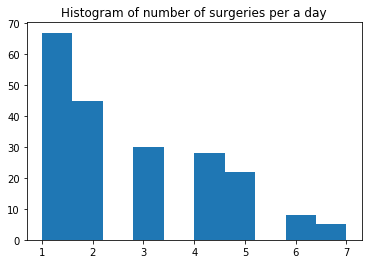

In [620]:
plt.hist(df["Date of surgery"].value_counts());
plt.title("Histogram of number of surgeries per a day");

**Column: Patient classification**

There are 10 classes:
    1.	Appendectomy
    2.	Bariatric
    3.	Colorectal
    4.	Emergency
    5.	Hernia
    6.	Hpb
    7.	Other
    8.	Small Bowel
    9.	Surgical Oncology
    10.	Upper Gi


In [568]:
df["Patient classification"].nunique()

17

In [569]:
df["Patient classification"].value_counts()

Bariatric            244
Colorectal           187
Surgical Oncology    126
Hernia                50
small bowel           28
Emergency             21
Small Bowel           11
hernia                 9
colorectal             9
bariatric              8
Upper GI               7
Other                  6
Small bowel            6
upper GI               2
HPB                    2
other                  1
Appendectomy           1
Name: Patient classification, dtype: int64

In [570]:
#unit classes differ in capital letters 
df["Patient classification"] = df["Patient classification"].str.title()

In [571]:
#number of unique values for each classification
df["Patient classification"].value_counts()

Bariatric            252
Colorectal           196
Surgical Oncology    126
Hernia                59
Small Bowel           45
Emergency             21
Upper Gi               9
Other                  7
Hpb                    2
Appendectomy           1
Name: Patient classification, dtype: int64

### **column: Name of surgery**

Names are quiet long. They should be classified into several categories 

In [572]:
df["Name of surgery"].nunique()

313

In [573]:
df[["Name of surgery"]].drop_duplicates()

,Name of surgery
0,DIAGNOSTIC/ STAGING LAPAROSCOPY 493200;LAPAROS...
1,CYTOREDUCTIVE SURGERY WITH HIPEC (HYPERTHERMIC...
2,LAPAROSCOPIC CHOLECYSTECTOMY 475620; LAPAROSCO...
3,"OPEN TOTAL GASTRECTOMY, WITH ESOPHAGOENTEROSTO..."
4,OPEN DISTAL SUBTOTAL GASTRECTOMY 436320
...,...
713,APPENDECTOMY;CYTOREDUCTIVE SURGERY WITH HIPEC ...
714,"ABDOMINAL HYSTERECTOMY, TOTAL WITH BSO (T.A.H ..."
715,CYTOREDUCTIVE SURGERY WITH HIPEC (HYPERTHERMIC...
716,CYTOREDUCTIVE SURGERY WITH HIPEC (HYPERTHERMIC...


### **column: Responsible surgeon**

In [574]:
surgeonsNames = df["Responsible surgeon"].value_counts()
surgeonsNames

Nissan Aviram             63
Hermon Hila               46
Goitman David             32
Segev Lior                29
                          16
Ben-Yaakov Almog          15
Hazan David               15
Vestrich Gali             10
Feigin Ania                5
Zippel Dov                 4
Ashkenazi Roni             2
Wexler-Feigin Ania         2
Klein Yorm                 2
Cohen Amir                 2
Nevo Jonathan              2
Friedman Orly-Zipporah     2
Berger Yaniv               1
Name: Responsible surgeon, dtype: int64

### **column: Urgency**

There are 603 elective surgeries.

In [575]:
df["Urgency"].value_counts()

elective    535
urgent      183
Name: Urgency, dtype: int64

There are 15 patients who underwent both elective and urgent surgeries.

In [576]:
df[df.groupby("Code")["Urgency"].transform('nunique') > 1].groupby("Code").ngroups

15

### **column: Surgical approach**

 There are 3 approaches:
    1.	Open
    2.	Laparoscopic
    3.	Robotic surgery

In [577]:
df["Surgical approach"].value_counts()

open               339
LAPAROSCOPIC       221
laparoscopic       157
Robotic surgery      1
Name: Surgical approach, dtype: int64

In [578]:
#fix laparoscopic       
df["Surgical approach"] = df["Surgical approach"].str.title()

In [579]:
df["Surgical approach"].value_counts()

Laparoscopic       378
Open               339
Robotic Surgery      1
Name: Surgical approach, dtype: int64

### **column: Complications**

In [580]:
df["Complications"].nunique()

90

In [581]:
counts = df["Complications"].value_counts()
pd.DataFrame({"Complications": counts.index, "counts": counts.values})

,Complications,counts
0,Anastomotic Leak,58
1,Skin and soft tissue - SSI- Superficial - 1,7
2,Gastrointestinal - lleus - 1,5
3,SSI- Superficial: 1,4
4,Cardiac - Cardiac arrhythmia - 2,3
5,Gastrointestinal - Abscess - 3a;Gastrointestin...,2
6,Hematology - Hemorrhage - 3b,2
7,Gastrointestinal - lleus - 2;Hematology - DVT ...,2
8,Gastrointestinal 03/09/2018\nlleus - 1 03/09...,1
9,Gastrointestinal - GI perforation - 3b;Pulmona...,1


# **Anastomotic Leak** 
There are 58 patients with anastomotic leak.

In [582]:
anastomoticLeak = df[df["Complications"] == "Anastomotic Leak"]
anastomoticLeak.shape

(58, 14)

In [583]:
anastomoticLeak

,Code,Days of hospitalization,Sex,Age,Date of surgery,Patient classification,Name of surgery,Responsible surgeon,Urgency,Surgical approach,Complications,Kk,Simple,Severe
1,1123813,42.0,male,59.0,2018-07-18,Surgical Oncology,CYTOREDUCTIVE SURGERY WITH HIPEC (HYPERTHERMIC...,Nissan Aviram,elective,Open,Anastomotic Leak,1.0,1.0,1.0
23,11315215,NaN,NaN,NaN,NaT,Upper Gi,OPEN DISTAL SUBTOTAL GASTRECTOMY 436320; OPEN ...,NaN,elective,Laparoscopic,Anastomotic Leak,1.0,1.0,NaN
24,11339133,NaN,male,26.0,2018-11-21,Upper Gi,EXPLORATORY LAPAROTOMY 490000;OPEN DISTAL SUBT...,NaN,urgent,Open,Anastomotic Leak,1.0,1.0,NaN
25,11341892,41.0,female,30.0,2018-03-13,Upper Gi,DIAGNOSTIC LAPAROSCOPY 493200;OPEN DISTAL SUBT...,NaN,urgent,Laparoscopic,Anastomotic Leak,1.0,NaN,1.0
48,46348673,NaN,NaN,NaN,2018-12-05,Colorectal,"OPEN COLECTOMY,PART.+END COLOSTOMY+DISTAL SEGM...",NaN,elective,Open,Anastomotic Leak,1.0,NaN,1.0
52,54474592,42.0,male,38.0,2018-03-21,Colorectal,"OPEN CLOSURE OF COLOSTOMY, WITH ANASTAMOSIS 44...",NaN,elective,Open,Anastomotic Leak,1.0,1.0,1.0
54,55829578,NaN,NaN,NaN,NaT,Colorectal,OPEN ANTERIOR RESECTION OF RECTUM 264; OPEN RI...,NaN,elective,Open,Anastomotic Leak,1.0,1.0,NaN
61,65984477,72.0,female,65.0,2018-06-18,Colorectal,"CLOSURE OF ILEOSTOMY, WITH SMALL TO SMALL ANAS...",Nissan Aviram,elective,Open,Anastomotic Leak,1.0,NaN,1.0
66,74071396,13.0,female,49.0,2018-07-18,Hernia,DIAGNOSTIC/ STAGING LAPAROSCOPY 493200;LAPAROS...,Hermon Hila,urgent,Laparoscopic,Anastomotic Leak,1.0,NaN,1.0
67,74266394,NaN,NaN,NaN,2018-01-24,Hpb,"PANCREATECTOMY, PROXIMAL (WHIPPLE-TYPE PROCEDU...",NaN,elective,Open,Anastomotic Leak,1.0,NaN,1.0


### Fill missing values 

Fill the sex of patients with known sex

In [584]:
df["Sex"] = df.groupby("Code")["Sex"].fillna(method="pad")

**Need to fill sex, age and dates of surgeries!**

In [605]:
#get patients with missing date of surgery
missing_vals = df[['pid','Sex', 'Age', 'Date of surgery', 'Name of surgery']]
missing_vals = missing_vals.sort_values(['Date of surgery', 'pid'], ascending=False)

path = "{}fill_missing_values_in_anonymous.csv".format(DATA_PATH)
missing_vals.to_csv(path, index=False, date_format='%d.%m.%Y') 

# Write output

In [585]:
#rename code column to "pid" (as it called in events file)
df.rename(columns={"Code": "pid"}, inplace=True)

output_path = "{}parseAnonymous0.csv".format(DATA_PATH)
df.to_csv(output_path, sep=',', index=False)